In [445]:
import pandas as pd
import numpy as np
data = pd.read_csv("weatherAUS.csv")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


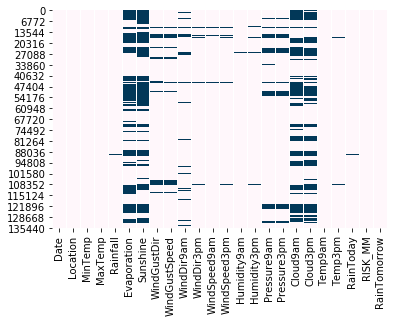

In [446]:
import seaborn as sns
sns.heatmap(data.isnull(), cbar=False, cmap='PuBu')

In [416]:
data.dropna(inplace = True)

In [417]:
data.reset_index(inplace = True,drop = True)

In [418]:
data.shape

(56420, 24)

In [419]:
#data.groupby("RainTomorrow").count().iloc[1,0]

In [420]:
12427/(12427+43993)

0.22025877348457992

In [421]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
tmp = data.select_dtypes(include=numerics)
tmp["RainTomorrow"]= data["RainTomorrow"]

/Users/zhangzihao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


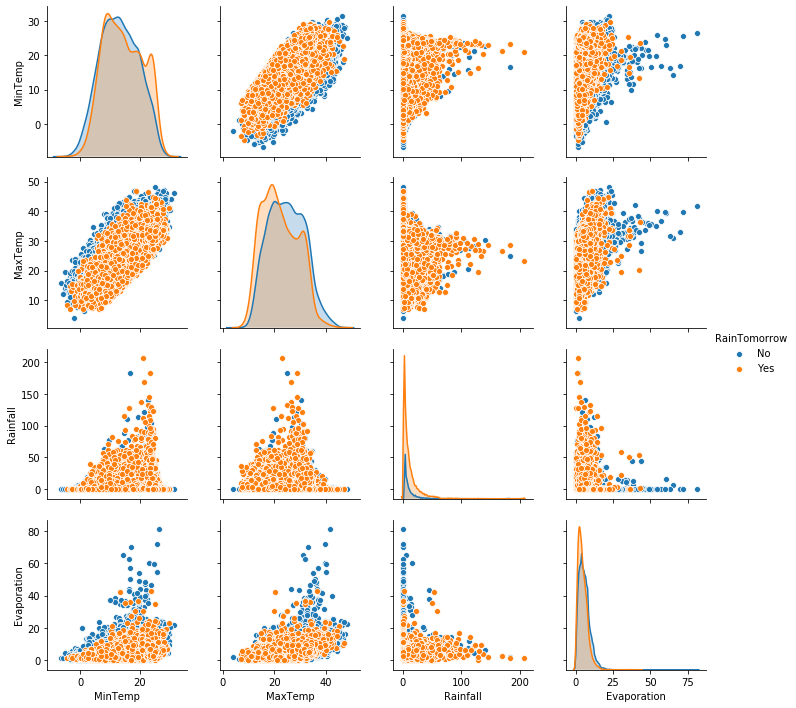

In [422]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(tmp, vars = tmp.columns[:4],hue="RainTomorrow")
plt.show()

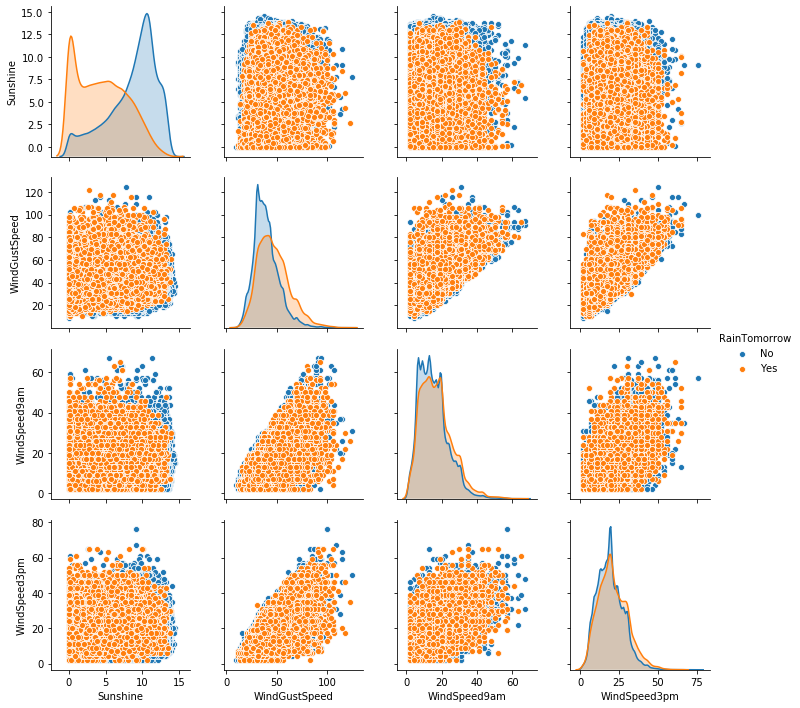

In [423]:
sns.pairplot(tmp, vars = tmp.columns[4:8],hue="RainTomorrow")
plt.show()

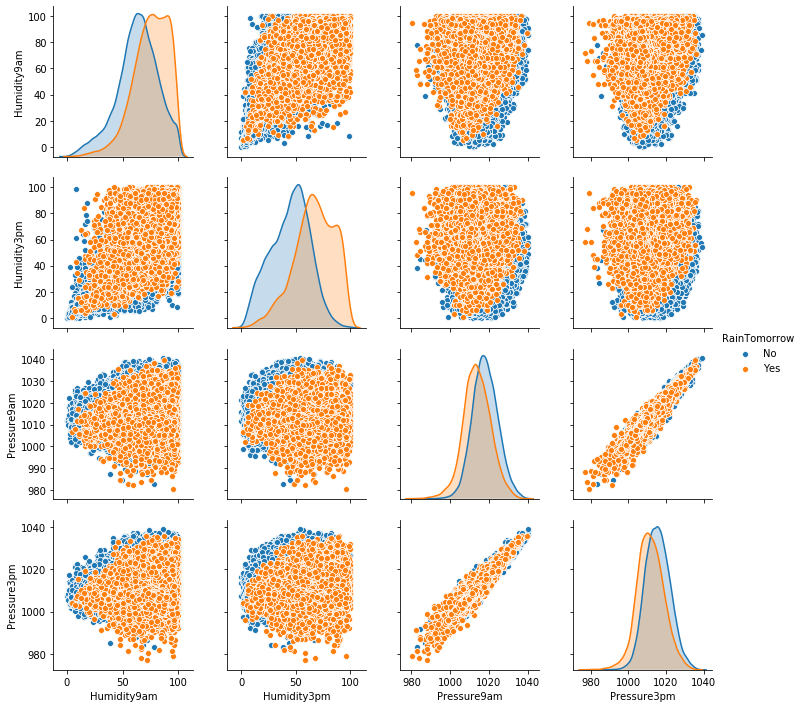

In [424]:
sns.pairplot(tmp, vars = tmp.columns[8:12],hue="RainTomorrow")
plt.show()

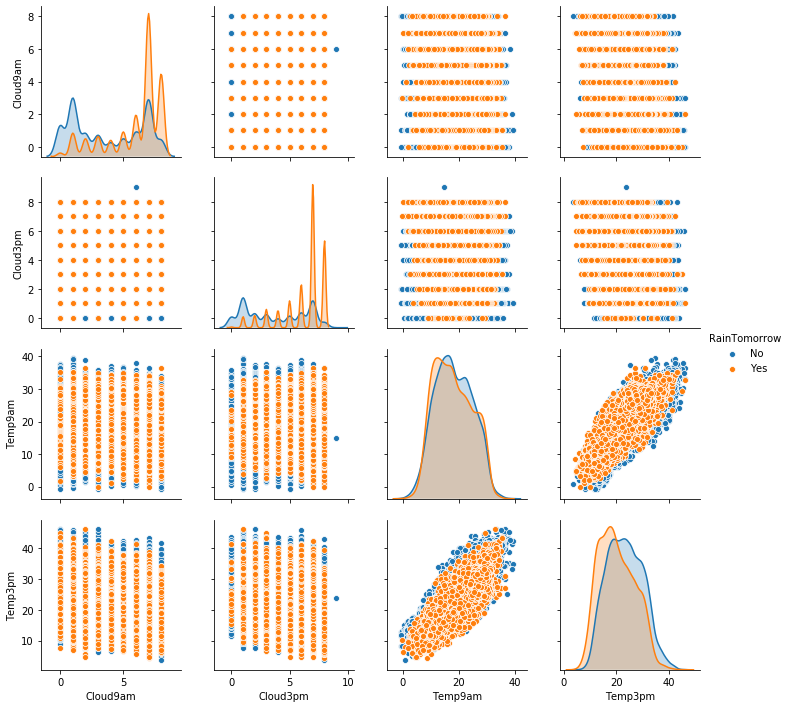

In [425]:
sns.pairplot(tmp, vars = tmp.columns[12:16],hue="RainTomorrow")
plt.show()

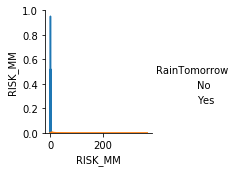

In [426]:
sns.pairplot(tmp, vars = tmp.columns[16:17],hue="RainTomorrow")
plt.show()

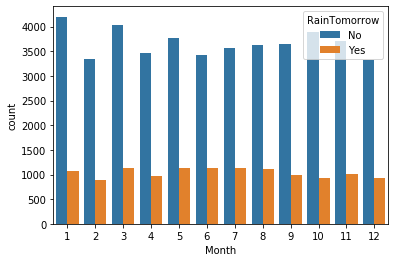

In [427]:
data['Month'] = pd.to_datetime(data['Date']).dt.month

# We check the target distribution across our new feature
sns.countplot(x = 'Month', hue =  'RainTomorrow', orient = 'h', data = data)

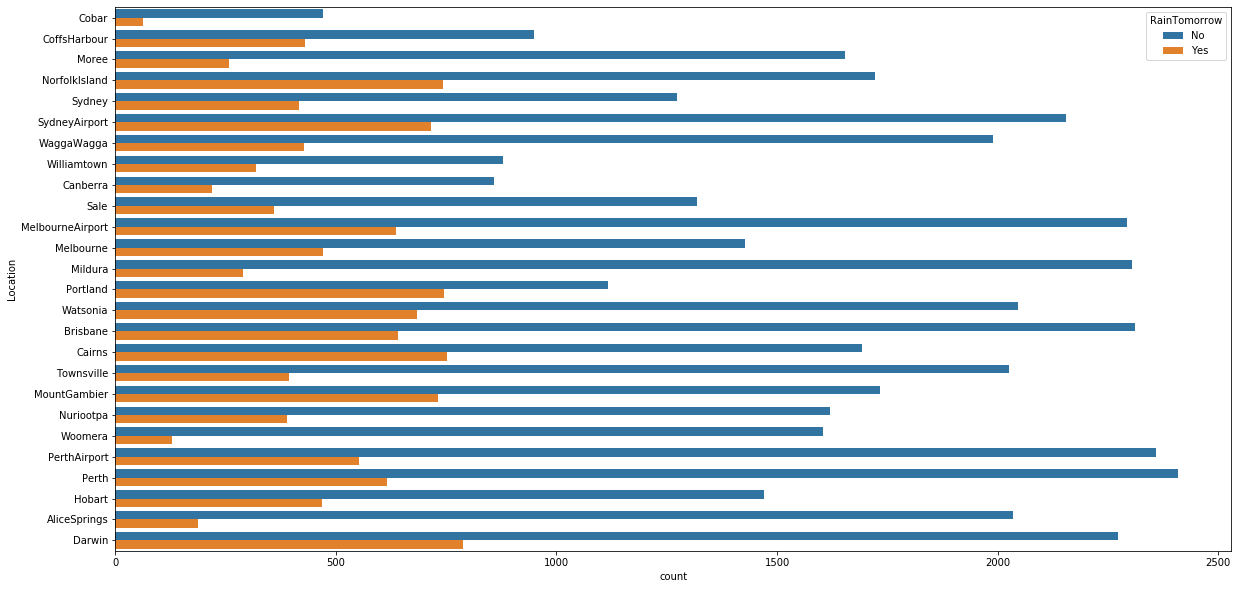

In [428]:
plt.figure(figsize=(20, 10))
sns.countplot(y = 'Location', hue =  'RainTomorrow', orient = 'h', data = data)

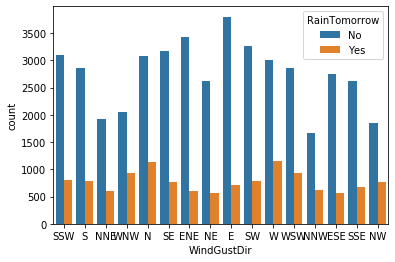

In [429]:
sns.countplot(x = 'WindGustDir', hue =  'RainTomorrow', orient = 'h', data = data)

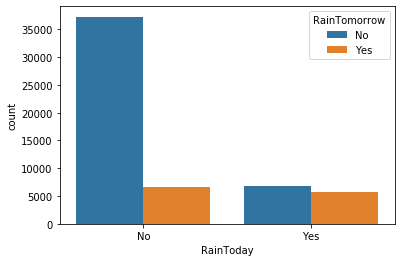

In [430]:
sns.countplot(x = 'RainToday', hue =  'RainTomorrow', orient = 'h', data = data)

In [431]:
# replace the string labels with 0 and 1 numbers:
data['RainToday'].replace({'No':0,'Yes':1},inplace = True)
data['RainTomorrow'].replace({'No':0,'Yes':1},inplace = True)

# encode categorical values
categorical = ['WindGustDir','WindDir9am','WindDir3pm','Location']
data = pd.get_dummies(data,columns = categorical,drop_first=True)

In [432]:
data.shape

(56420, 91)

In [433]:
data

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Woomera
0,2009-01-01,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,...,0,0,0,0,0,0,0,0,0,0
1,2009-01-02,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,...,0,0,0,0,0,0,0,0,0,0
2,2009-01-04,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,...,0,0,0,0,0,0,0,0,0,0
3,2009-01-05,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,...,0,0,0,0,0,0,0,0,0,0
4,2009-01-06,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,2017-06-20,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,...,0,0,0,0,0,0,0,0,0,0
56416,2017-06-21,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,...,0,0,0,0,0,0,0,0,0,0
56417,2017-06-22,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,...,0,0,0,0,0,0,0,0,0,0
56418,2017-06-23,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,...,0,0,0,0,0,0,0,0,0,0


In [434]:
data.select_dtypes(include=numerics).describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,2.346960,0.220259,6.425009
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,8.731885,0.414425,3.451383
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000,0.000000,1.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,0.000000,0.000000,3.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,0.000000,0.000000,6.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,0.600000,0.000000,9.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,367.600000,1.000000,12.000000


# NN

In [435]:
data.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'Month',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE',
       'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S',
       'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW',
       'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_ENE',
       'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
       'WindDi

In [436]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = data.drop(labels = ['RainTomorrow','Date',"RISK_MM"],axis = 1)
y = data['RainTomorrow']
x = sc.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 40)
x_test,x_validation,y_test,y_validation = train_test_split(x_test,y_test,test_size = 0.5,random_state = 40)

In [437]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

In [386]:
classifier = Sequential()

In [387]:
classifier.add(Dense(units = 30,kernel_initializer='uniform',activation = 'relu',input_dim = 88))
classifier.add(Dense(units = 30,kernel_initializer='uniform',activation = 'relu'))
classifier.add(Dense(units = 30,kernel_initializer='uniform',activation = 'relu'))
classifier.add(Dense(units = 1,activation='sigmoid',kernel_initializer='uniform'))

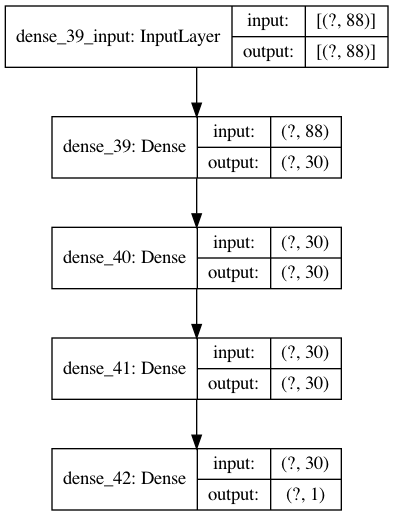

In [388]:
 from keras.utils import plot_model
 plot_model(classifier, show_shapes=True, to_file='model.png')

In [389]:
print(classifier.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 30)                2670      
_________________________________________________________________
dense_40 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_41 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 31        
Total params: 4,561
Trainable params: 4,561
Non-trainable params: 0
_________________________________________________________________
None


In [390]:
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [391]:
classifier.fit(x_train,y_train,epochs = 100,batch_size=10)

Epoch 1/100
3386/3386 [==============================] - 2s 637us/step - loss: 0.3548 - accuracy: 0.84030s - loss: 0.3621 - accuracy: 0.83 - ETA: 0s - loss: 0.3603  - ETA: 0s - loss: 0.3554 - accuracy: 0.83
Epoch 2/100
3386/3386 [==============================] - 2s 623us/step - loss: 0.3229 - accuracy: 0.8597
Epoch 3/100
3386/3386 [==============================] - 2s 625us/step - loss: 0.3152 - accuracy: 0.8629
Epoch 4/100
3386/3386 [==============================] - 2s 623us/step - loss: 0.3088 - accuracy: 0.8659
Epoch 5/100
3386/3386 [==============================] - 2s 624us/step - loss: 0.3045 - accuracy: 0.8678
Epoch 6/100
3386/3386 [==============================] - 2s 627us/step - loss: 0.3010 - accuracy: 0.8707
Epoch 7/100
3386/3386 [==============================] - 2s 624us/step - loss: 0.2970 - accuracy: 0.8728
Epoch 8/100
3386/3386 [==============================] - 2s 630us/step - loss: 0.2953 - accuracy: 0.8720
Epoch 9/100
3386/3386 [==============================] - 2

3386/3386 [==============================] - 2s 625us/step - loss: 0.2054 - accuracy: 0.9129
Epoch 78/100
3386/3386 [==============================] - 2s 627us/step - loss: 0.2031 - accuracy: 0.9143
Epoch 79/100
3386/3386 [==============================] - 2s 624us/step - loss: 0.2029 - accuracy: 0.9142
Epoch 80/100
3386/3386 [==============================] - 2s 623us/step - loss: 0.2024 - accuracy: 0.9149
Epoch 81/100
3386/3386 [==============================] - 2s 624us/step - loss: 0.2018 - accuracy: 0.9149
Epoch 82/100
3386/3386 [==============================] - 2s 624us/step - loss: 0.2025 - accuracy: 0.9138
Epoch 83/100
3386/3386 [==============================] - 2s 621us/step - loss: 0.2003 - accuracy: 0.9142
Epoch 84/100
3386/3386 [==============================] - 2s 620us/step - loss: 0.1998 - accuracy: 0.9154
Epoch 85/100
3386/3386 [==============================] - 2s 619us/step - loss: 0.1993 - accuracy: 0.9165
Epoch 86/100
3386/3386 [==============================] - 2

In [392]:
y_pred = classifier.predict_classes(x_test)
y_train_pred = classifier.predict_classes(x_train)
y_validation_pred = classifier.predict_classes(x_validation)

In [393]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('Training Accuracy ---->',accuracy_score(y_train,y_train_pred))
print('Testing Accuracy  ---->',accuracy_score(y_test,y_pred))
print('Validation Accuracy  ---->',accuracy_score(y_validation,y_validation_pred))

Training Accuracy ----> 0.9255583126550868
Testing Accuracy  ----> 0.8430521091811415
Validation Accuracy  ----> 0.8446472881956752


In [394]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     26303
           1       0.92      0.73      0.81      7549

    accuracy                           0.93     33852
   macro avg       0.93      0.85      0.88     33852
weighted avg       0.93      0.93      0.92     33852



In [395]:
print(confusion_matrix(y_train,y_train_pred))

[[25857   446]
 [ 2074  5475]]


In [396]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      8854
           1       0.67      0.53      0.59      2430

    accuracy                           0.84     11284
   macro avg       0.78      0.73      0.75     11284
weighted avg       0.83      0.84      0.84     11284



In [397]:
print(confusion_matrix(y_test,y_pred))

[[8230  624]
 [1147 1283]]


# DT

In [398]:
import sklearn.tree as st

In [399]:
model = st.DecisionTreeClassifier(max_depth=8)

In [400]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [401]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [402]:
y_pred_test = model.predict(x_test)
y_validation_test = model.predict(x_validation)
y_train_pred_dt = model.predict(x_train)

In [403]:
fi = model.feature_importances_

In [404]:
names = data.columns

In [405]:
fi[np.argsort(-fi)]

array([5.65072554e-01, 1.49384333e-01, 9.95427178e-02, 6.77495308e-02,
       1.73026132e-02, 9.43671973e-03, 8.40865035e-03, 8.33960309e-03,
       7.77194911e-03, 6.26916718e-03, 6.24191152e-03, 5.75868022e-03,
       4.96002866e-03, 4.72155535e-03, 3.85435899e-03, 3.80113857e-03,
       3.14951752e-03, 2.73210112e-03, 2.39263709e-03, 2.16090573e-03,
       2.12462873e-03, 1.70914321e-03, 1.51636413e-03, 1.44313610e-03,
       1.19913080e-03, 1.15335378e-03, 1.03658330e-03, 1.01010994e-03,
       9.86005239e-04, 8.32976221e-04, 7.99942630e-04, 7.88905551e-04,
       7.47907683e-04, 7.04402904e-04, 6.95978623e-04, 6.69807769e-04,
       5.06113490e-04, 4.97161369e-04, 4.51128321e-04, 4.09178518e-04,
       3.59664316e-04, 3.29956856e-04, 3.11940045e-04, 2.84395878e-04,
       2.11645358e-04, 1.69766710e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [406]:
names[np.argsort(-fi)]

Index(['Humidity9am', 'Evaporation', 'Pressure9am', 'Sunshine', 'MaxTemp',
       'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Date', 'RainToday',
       'WindGustSpeed', 'Humidity3pm', 'MinTemp', 'WindDir3pm_W', 'Cloud9am',
       'Cloud3pm', 'Rainfall', 'WindDir9am_WSW', 'WindDir9am_ESE',
       'WindDir3pm_S', 'Location_Moree', 'WindGustDir_WSW',
       'Location_MountGambier', 'Pressure3pm', 'Location_Cairns',
       'Location_Darwin', 'WindDir3pm_N', 'WindDir3pm_ESE', 'Location_Perth',
       'WindGustDir_SW', 'Location_PerthAirport', 'Location_NorfolkIsland',
       'Location_SydneyAirport', 'WindDir9am_SE', 'WindDir3pm_NE',
       'WindDir3pm_SSE', 'WindGustDir_S', 'Location_Mildura', 'WindDir3pm_NW',
       'WindDir9am_SSE', 'Location_Cobar', 'WindGustDir_NNE',
       'Location_Melbourne', 'WindDir9am_ENE', 'WindGustDir_SSW',
       'WindGustDir_WNW', 'Location_Hobart', 'Location_Nuriootpa',
       'WindDir3pm_SSW', 'Location_MelbourneAirport', 'WindDir3pm_SW',
       'WindDir3p

In [407]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_train,y_train_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     26303
           1       0.77      0.56      0.65      7549

    accuracy                           0.87     33852
   macro avg       0.83      0.76      0.78     33852
weighted avg       0.86      0.87      0.86     33852



In [408]:
print(confusion_matrix(y_train,y_train_pred_dt))

[[25047  1256]
 [ 3311  4238]]


In [409]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8854
           1       0.70      0.53      0.60      2430

    accuracy                           0.85     11284
   macro avg       0.79      0.73      0.75     11284
weighted avg       0.84      0.85      0.84     11284



In [410]:
print(confusion_matrix(y_validation,y_validation_test))

[[8326  510]
 [1202 1246]]


# LR

In [411]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(C=3000,random_state=123)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(u"Confusion matrix",confusion_matrix(y_true=y_test,y_pred=y_pred))
lr.coef_

/Users/zhangzihao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix [[8335  519]
 [1081 1349]]


array([[-1.23179757e-01, -3.88806497e-02,  6.72086033e-02,
         2.32120031e-02, -5.70869599e-01,  7.76535596e-01,
        -4.88379508e-02, -1.76231978e-01,  7.40399782e-02,
         1.18872474e+00,  9.38276235e-01, -1.35609295e+00,
        -6.18462497e-02,  3.14081328e-01,  9.69235379e-02,
         1.69785146e-01,  1.55167810e-01,  6.30209313e-02,
        -4.71052210e-02, -1.70449229e-02, -6.54447100e-02,
        -5.31115235e-02, -3.61880608e-02, -2.06588000e-02,
        -1.11985041e-02,  2.39742075e-02, -6.14332073e-03,
         1.77889957e-02,  3.96359077e-02,  2.72937919e-02,
         1.10319458e-02,  8.94648759e-03,  2.04030155e-02,
         8.96576569e-02, -3.86114050e-02,  5.56418511e-02,
         9.49650371e-02,  1.17248314e-01,  2.97319381e-02,
         4.41343713e-02, -3.34287419e-02, -9.14773939e-03,
        -4.45394049e-02, -9.84172758e-03,  4.50028833e-02,
         7.59144347e-02,  3.45526402e-02,  5.00570177e-02,
        -1.32679678e-02,  1.32414463e-02,  6.03979731e-0

In [412]:
lr

LogisticRegression(C=3000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [413]:
y_test_pred_lr = lr.predict(x_test)
y_validation_pred_lr = lr.predict(x_validation)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     26303
           1       0.92      0.73      0.81      7549

    accuracy                           0.93     33852
   macro avg       0.93      0.85      0.88     33852
weighted avg       0.93      0.93      0.92     33852

[[26303     0]
 [    0  7549]]


In [414]:
print(classification_report(y_test,y_test_pred_lr))
print(confusion_matrix(y_test,y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      8854
           1       0.72      0.56      0.63      2430

    accuracy                           0.86     11284
   macro avg       0.80      0.75      0.77     11284
weighted avg       0.85      0.86      0.85     11284

[[8335  519]
 [1081 1349]]


# Random forest

In [441]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100, random_state=42)

rf.fit(x_train, y_train)

y_pred_test = rf.predict(x_test)
y_validation_test = rf.predict(x_validation)
y_train_pred_dt = rf.predict(x_train)


print(classification_report(y_train,y_train_pred_dt.round()))




print(classification_report(y_test,y_pred_test.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26303
           1       1.00      1.00      1.00      7549

    accuracy                           1.00     33852
   macro avg       1.00      1.00      1.00     33852
weighted avg       1.00      1.00      1.00     33852

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      8854
           1       0.78      0.53      0.63      2430

    accuracy                           0.87     11284
   macro avg       0.83      0.74      0.77     11284
weighted avg       0.86      0.87      0.86     11284

